# Unstructured Data Analytics HW1

Name: Aditi Gupta

Andrew ID: argupta

Collaborators (if none, say "none"; do *not* leave this blank): ChatGPT

Wikipedia: https://en.wikipedia.org/wiki/Zipf%27s_law#:~:text=Zipf's%20law%20

Site 1: #https://indhumathychelliah.medium.com/different-ways-to-sort-the-list-of-tuples-321be7cd8d01#:~:text=Using%20sorted%20function,-sorted()%20%E2%80%94%20It&text=In%20the%20key%20parameter%2C%20we,which%20specifies%20the%20sorting%20method.&text=It%20will%20sort%20based%20on,will%20sort%20in%20ascending%20order.

Reminder: you should not be sharing code.

**Reminder:** As stated in Lecture 1, homework assignments this semester will be submitted as PDFs and, in particular, we will not be re-running your code. Please make sure that you have run all your code cells so that the code cell outputs are actually displayed. To save your Jupyter notebook as a PDF, we recommend simply using your browser's print functionality and using that to print/save the notebook as a PDF.

**Warning: make sure your compute environment is set up first.** This homework assignment assumes that you have already installed Anaconda Python 3 and spaCy. Instructions for installing these are part of the tutorial [here](https://www.andrew.cmu.edu/user/georgech/95-865/Anaconda,%20Jupyter,%20and%20spaCy%20setup%20tutorial.pdf).

### Instructions
1. Fill in your name, Andrew ID, and collaborators above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any code cells that you have entered code for but did not actually execute will be disregarded, so please be sure to actually run your code first and make sure it runs without errors! We may re-run a subset of your code for grading purposes.)
5. Be careful about where you save data for use with this Jupyter notebook (more details on this later).

### [Problem 1] Basic Text Analysis [45 pts]

This problem involves a mix of Python review (loops, conditionals, counters/dictionaries, sorting) and learning to work with a sizable collection of text data.

You will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English) called *Zipf's law*, which relates how frequently a word occurs in a language to its "rank" (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). Roughly speaking, the word with rank 1 appears twice as likely as the word with rank 2, and the three times as likely as the word with rank 3, and so forth. (Some details on Zipf's law can be found on [Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law).) In this problem, you are going to check whether Zipf's law holds for a real dataset of text documents.

The dataset we look at is a collection of the 100 most popular books downloaded from the [Gutenburg Project](https://www.gutenberg.org/browse/scores/top). These 100 books form the corpus that we consider for this problem. Each file contains the text of a book. We will read in all 100 books.

Note: Please *do not* change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will not receive points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

```python
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
```

**(a) Warm-up/basic Python review [15 pts across subparts].** This part serves as a warm-up, getting you familiar with the kind of code we will be writing in this class. Note that throughout part (a), your code should **not** be using spaCy.

**Subpart i [5 pts].** Write a loop that iterates through all 100 books; for each book, print out its corresponding file name and also how long the book is in terms of string length (meaning that if we load in the book as a string, we compute the length of the string using the built-in Python function `len`; this is just counting the number of characters).

**Please do not actually print out the contents of each book since many of the books are extremely long, and by printing out all the books' contents, you'll end up creating a Jupyter notebook that has a massive file size.**

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

Your output should look like (although there should be 100 books rather than 3 as shown below; also, the ordering of the books might be different on your machine):

```
./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
```

In [289]:
########################################################################
######################### Write your code here #########################
########################################################################
import glob
#num = len(glob.glob('./HW1_Dataset/*.txt'))
#print(num)
i=1
for file in glob.glob('./HW1_Dataset/*.txt'):
    with open(file, 'r') as f:
        book_content = f.read()
        # Compute the string length of the book
        book_length = len(book_content)
        print (f'{i}. {file} {book_length}')
        i+=1

1. ./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
2. ./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
3. ./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
4. ./HW1_Dataset/The King James Version of the Bible (132).txt 4351846
5. ./HW1_Dataset/Et dukkehjem. English by Henrik Ibsen (557).txt 161241
6. ./HW1_Dataset/Outpost in the Wilderness_ Fort Wayne, 1706-1828 by Charles Poinsatte (161).txt 363234
7. ./HW1_Dataset/The Romance of Lust_ A Classic Victorian erotic novel by Anonymous (294).txt 1051148
8. ./HW1_Dataset/The Odyssey by Homer (124).txt 697404
9. ./HW1_Dataset/A History of Spanish Literature by James Fitzmaurice-Kelly (109).txt 765918
10. ./HW1_Dataset/The Philosophy of Spiritual Activity by Rudolf Steiner (144).txt 545031
11. ./HW1_Dataset/My Fifteen Lost Years by Florence Elizabeth Maybrick (499).txt 383694
12. ./HW1_Dataset/Prestuplenie i nakazanie. English by Fyod

**Subpart ii [5 pts].** Copy and paste your code from **subpart i** into the code cell below. Then in the code cell below, modify the code so that it prints out the top 15 longest books (in terms of raw string length, which is what you had already computed). In particular, please write your code so that the printout is of the following format:

```
1. <number of characters in longest text file> <filename of longest text file>
2. <number of characters in 2nd longest text file> <filename of 2nd longest text file>
...
15. <number of characters in 15th longest text file> <filename of 15th longest text file>
```

Note: only print out information for the top 15 books in the format above; please do not repeat printing what we asked you to print in **subpart i**.

In [290]:
########################################################################
######################### Write your code here #########################
########################################################################

import glob
#num = len(glob.glob('./HW1_Dataset/*.txt'))
#print(num)
books=[]
for file in glob.glob('./HW1_Dataset/*.txt'):
    with open(file, 'r') as f:
        book_content = f.read()
        # Compute the string length of the book
        book_length = len(book_content)
        books.append((file, book_length)) 
# Site 1
sorted_list=sorted(books,key=lambda x:int(x[1]), reverse=True)

# Print the top 15 longest books
print("Top 15 Longest Books:")
for i in range(15):
    print(f'{i+1}. {sorted_list[i][1]} {sorted_list[i][0]}')

Top 15 Longest Books:
1. 5465100 ./HW1_Dataset/The Complete Works of William Shakespeare by William Shakespeare (132).txt
2. 4351846 ./HW1_Dataset/The King James Version of the Bible (132).txt
3. 3254333 ./HW1_Dataset/Les Misérables by Victor Hugo (165) (Unicode Encoding Conflict).txt
4. 3227580 ./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt
5. 3033575 ./HW1_Dataset/Essays of Michel de Montaigne — Complete by Michel de Montaigne (205).txt
6. 2643849 ./HW1_Dataset/The Count of Monte Cristo, Illustrated by Alexandre Dumas (160).txt
7. 1534140 ./HW1_Dataset/Ulysses by James Joyce (282).txt
8. 1378627 ./HW1_Dataset/My Secret Life, Volumes I. to III. by Anonymous (157).txt
9. 1238569 ./HW1_Dataset/Moby Dick; Or, The Whale by Herman Melville (413).txt
10. 1231784 ./HW1_Dataset/Leviathan by Thomas Hobbes (417).txt
11. 1214387 ./HW1_Dataset/The Republic by Plato (246).txt
12. 1200021 ./HW1_Dataset/The History of the Peloponnesian War by Thucydides (122).txt
13. 1175588 ./HW1_Datase

**Subpart iii [5 pts].** You should find that some of the books are quite long. Processing very long books will be problematic with spaCy, so we will want to chop up long books into pieces. Note that later on in the course, we shall see that chopping up large amounts of data into small pieces or "batches" is in fact quite common in machine learning since for massive datasets, we often cannot store them in their entirety on a CPU or GPU for processing all at once.

As a toy example, suppose that a book's text is `'cat dog shark spam eggs'` and we want to split it up into batches where each batch has at most 3 words. Then we could split up the book's text into two batches/pieces: `'cat dog shark'` and `'spam eggs'`.

We have provided code for you to do this below.

In [306]:
import numpy as np

def split_into_batches(book_text, max_num_words_per_batch):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) /\
                                  max_num_words_per_batch))
    batches = []
    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)
    return batches

print(split_into_batches('cat dog shark spam eggs', 3))


['cat dog shark', 'spam eggs']


Now write a loop that goes through all 100 books again. However, for each book, split it up into batches so that each batch has at most 10000 words. In this case, how many batches are there total across all 100 books? Please write code that computes this number of batches. Your code should print out the following (with the correct total number of batches):

```
Total number of batches: <total number of batches across all 100 books>
```

In [292]:
########################################################################
######################### Write your code here #########################
########################################################################
total=0
for file in glob.glob('./HW1_Dataset/*.txt'):
    with open(file, 'r') as f:
        book_content = f.read()
    total=total+len(split_into_batches(book_content, 10000))
print(f'Total number of batches: {total}')

Total number of batches: 1246


**(b) [10 pts]** Now we will finally use spaCy. Note that for this problem, you don't actually need `spaCy`'s named entity recognition or grammatical parsing. Turning these elements off when you instantiate the `nlp` object can substantially speed up your code. To make sure these are off when instantiating the `nlp` object, call: 

```python
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
```

**Throughout this problem, do not remove stopwords.**

Build a term frequency (raw counts) table that is for all 100 books. Specifically, building on your solution to part (a)-subpart iii, read in a single book at a time and for each book, do the following:

  1. Split it up into batches where each batch has at most 10000 words.
  2. For each batch:
    1. Process the batch by separating and lemmatizing the words
    2. Count the number of times each lemma appears and add these to the frequency table. For simplicity, **do not convert lemmas to lowercase**. (Note that we use raw counts as the "frequency"--do not do any division.) Also, as we explain below, we will only count lemmas that are alphabetic.

Note that just as we had said in part (a): do **not** print out the complete contents of every book since doing so will result in a Jupyter notebook file that is massive.

After looping through all 100 books, you should have the term frequency table for the entire corpus (importantly, the frequency table should not just be for a single book; it should be for all 100 books). Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the lemmas, only include lemmas that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

```python
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
```

In [293]:
########################################################################
######################### Write your code here #########################
########################################################################
import spacy
from collections import Counter
histogram_with_some_filtering = Counter()
import re  # regular expression package
# load spaCy's built-in English models
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])  

for file in glob.glob('./HW1_Dataset/*.txt'):
    with open(file, 'r') as f:
        book_content = f.read()
        batches=split_into_batches(book_content, 10000)

        for batch in batches:
            parsed_text = nlp(batch)

            for token in parsed_text:
                lemma = token.lemma_
                if re.match('[a-zA-Z]+$', lemma):
                    # there's a part of speech 'X' that stands for 
                    # "other" and consists of mostly junk
                    
                    if not (token.pos_ == 'PUNCT' or token.pos_ ==\
                            'SPACE' or token.pos_ == 'X'):
                        histogram_with_some_filtering[lemma] += 1

sorted_lemma_count_pairs = histogram_with_some_filtering.\
most_common(50)
for lemma, count in sorted_lemma_count_pairs:
    print(lemma, ":", count)

the : 702463
be : 436114
and : 435424
of : 386347
to : 324409
I : 255129
a : 233391
in : 204248
he : 193621
that : 159010
have : 158132
it : 135431
not : 111854
his : 108536
you : 102595
with : 101227
they : 96821
for : 95320
as : 90702
she : 78524
but : 75599
my : 73983
do : 68754
at : 64947
on : 62833
by : 61274
this : 61240
we : 60300
which : 58868
all : 58636
say : 58348
from : 50095
so : 47999
or : 47810
her : 42838
one : 41123
will : 40920
man : 39585
their : 38418
what : 37851
no : 37795
there : 37209
if : 34898
go : 33897
when : 33587
an : 32488
come : 32358
see : 32024
would : 31289
who : 30934


**(c) [10 pts]** Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

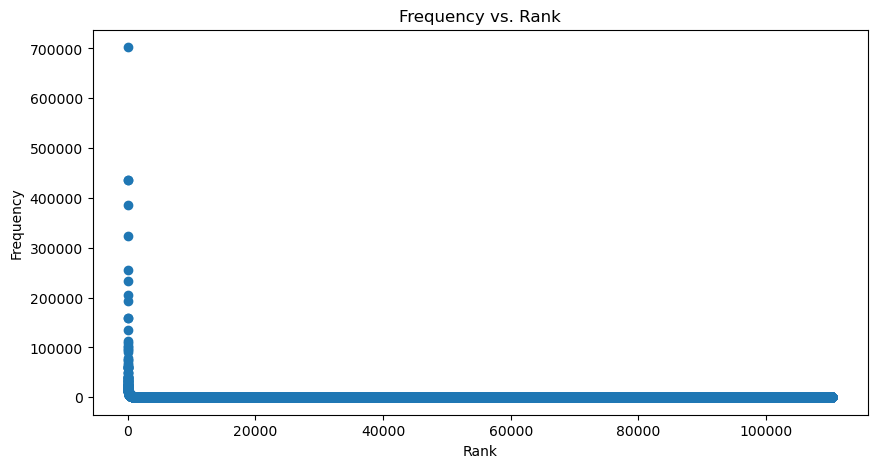

In [294]:
# Raw scatter plot
########################################################################
######################### Write your code here #########################
########################################################################

import matplotlib.pyplot as plt
import numpy as np

# Assuming `term_frequencies` is your Counter object 
# from the previous operations

# Extract frequencies and sort them in descending order

frequencies = [freq for word, freq in histogram_with_some_filtering.\
               most_common()]
ranks = range(1, len(frequencies) + 1)

# Raw Scatter Plot
plt.figure(figsize=(10, 5))
plt.scatter(ranks, frequencies)
plt.title('Frequency vs. Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

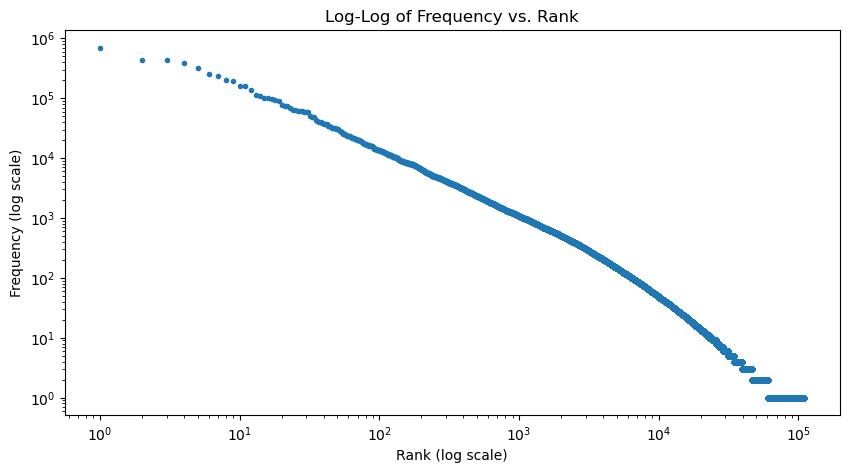

In [295]:
# Log-log plot
########################################################################
######################### Write your code here #########################
########################################################################
plt.figure(figsize=(10, 5))
plt.loglog(ranks, frequencies, marker='.', linestyle='None')
plt.title('Log-Log of Frequency vs. Rank')
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.show()

**(d) [10 pts across subparts]** Let's now try to make sense of the very last plot in part **(c)**. Zipf's law states that term frequency is governed by a power law, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant that is approximately 0.1*(corpus size) for English.

Please answer the following questions:

**Subpart i [2 pts].** What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code): *** WRITE YOUR ANSWER HERE ***

The relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$. When we take the log of this, it becomes log(f(r))=log(c)−log(r). This resembles an inverse linear relationship expressed as y=mx+c where y=log(f(r)), m=−1, x=log(r), and b=log(c). As can be seen from my log-log plot, it is a straight line with a negative slope. This suggests that he log-log plot is consistent with power law. Typically, there are deviations, but the central tendency is linear. 

[Wikipedia] 
Word frequencies in natural languages

In many texts in human languages, word frequencies approximately follow a Zipf distribution with the most common word occuring about n times the nth most common one.

The actual rank-frequency plot of a natural language text deviates in some extent from the ideal Zipf distribution, especially at the two ends of the range. The deviations may depend on the language, on the topic of the text, on the author, on whether the text was translated from another language, on corpus size, and on the spelling rules used. Some deviation is inevitable because of sampling error.

At the low-frequency end, where the rank approaches N, the plot takes a staircase shape, because each word can occur only an integer number of times.

**Subpart ii [4 pts].** Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphabetic words; thus what remains in the bag are actually alphabetic lemmas). What is the probability of drawing one of the 4 most frequent alphabetic lemmas? What is the probability of drawing one of the 50 most frequent alphabetic lemmas? Answer these two questions using code rather than just entering in the final answers as numbers.

In [296]:
print('Probability of drawing one of the 4 most frequent alphabetic\
lemmas: ')
########################################################################
######################### Write your code here #########################
########################################################################
total=0
total_top_4=0
sorted_lemma_count_pairs_top_4 = histogram_with_some_filtering.\
most_common(4)
for lemma, count in sorted_lemma_count_pairs_top_4:
    total_top_4+=count

frequencies = [freq for word, freq in histogram_with_some_filtering.\
               most_common()]
for freq in frequencies:
    total+=freq

probability_top_4 = total_top_4/total
print(f'{probability_top_4:.5f}')
    

print('Probability of drawing one of the 50 most frequent alphabetic\
lemmas: ')
########################################################################
######################### Write your code here #########################
########################################################################
total_top_50=0
for lemma, count in sorted_lemma_count_pairs:
    total_top_50+=count
    
probability_top_50 = total_top_50/total
print(f'{probability_top_50:.5f}')

Probability of drawing one of the 4 most frequent alphabeticlemmas: 
0.16231
Probability of drawing one of the 50 most frequent alphabeticlemmas: 
0.48330


**Subpart iii [4 pts].** What proportion of the alphabetic lemmas occur only once? What proportion of the alphabetic lemmas occur fewer than 10 times?

In [305]:
print("Occur only once: ")
########################################################################
######################### Write your code here #########################
########################################################################
occur_once=0
frequency=0
frequencies = [freq for word, freq in histogram_with_some_filtering.\
               most_common()]
for freq in frequencies:
    frequency+=freq
    if (freq==1):
        occur_once+=1

probability_occur_once=occur_once/len(frequencies)
print(f'{probability_occur_once:.5f}')

print("Occur fewer than 10 times: ")
########################################################################
######################### Write your code here #########################
########################################################################
occur_fewer_than_10=0
frequencies = [freq for word, freq in histogram_with_some_filtering.\
               most_common()]
for freq in frequencies:
    if (freq<10):
        occur_fewer_than_10+=1

probability_occur_fewer_than_10=occur_fewer_than_10/len(frequencies)
print(f'{probability_occur_fewer_than_10:.5f}')

Occur only once: 
0.44738
Occur fewer than 10 times: 
0.78140


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

```python
import nltk
nltk.download('reuters')
```

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing. Hence, you will want to instantiate the nlp object by calling:

```python
nlp = spacy.load('en_core_web_sm', disable=['parser'])
```


**(a) [15 pts]** Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

/Users/gupta/anaconda3/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Text(0, 0.5, 'Counts')

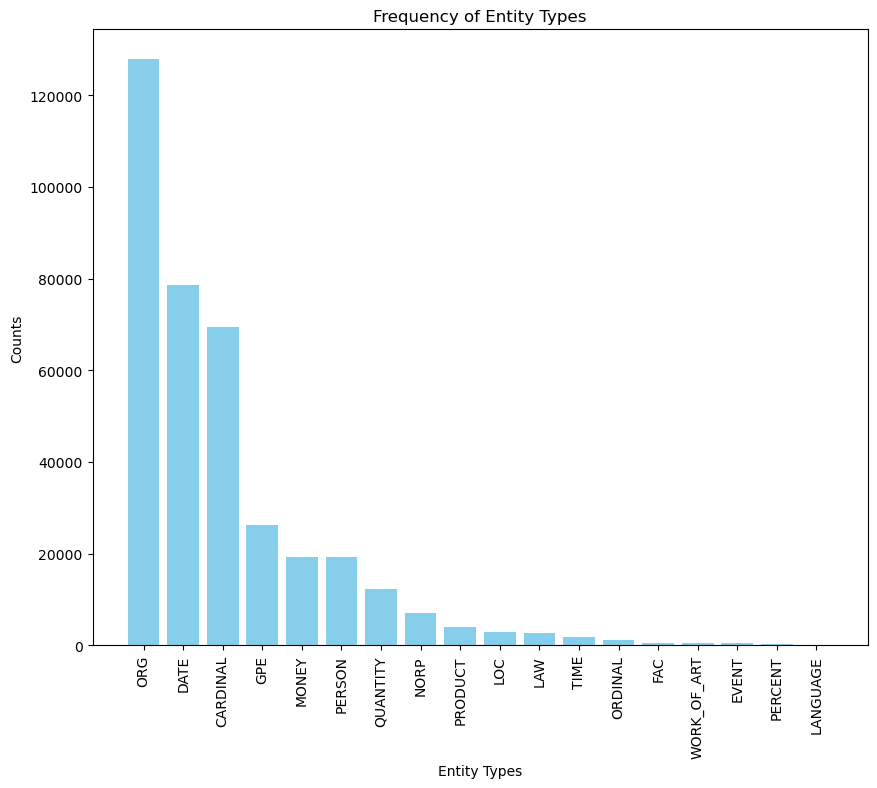

In [298]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  
# hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) \
               for i in reuters_fileids]
label_counter = Counter()

########################################################################
######################### Write your code here #########################
########################################################################
for doc in reuters_nlp:
    for token in doc:
        entity= token.ent_type_
        # there's a part of speech 'X' that stands for "other" 
        # and consists of mostly junk
        
        if entity:
            label_counter[entity] += 1

sorted_entity_count_pairs = label_counter.most_common()

# Extracting the entity types and their corresponding counts
entities = [entity for entity, count in sorted_entity_count_pairs]
counts = [count for entity, count in sorted_entity_count_pairs]

# Create the bar plot
plt.figure(figsize=(10, 8)) 
plt.bar(entities, counts, color='skyblue')

# Rotate the x labels to make them readable
plt.xticks(rotation=90)

# Add title and labels to the plot
plt.title('Frequency of Entity Types')
plt.xlabel('Entity Types')
plt.ylabel('Counts')

**(b) [15 pts]** Now list the top 10 most frequently occurring entities (entity text and the number of occurence) with label `ORG` (organization). Separately list the top 10 most frequently occurring entities with label `GPE` (geopolitical entity such as countries, cities, states) respectively. **In both cases, please convert the entity names to lowercase first before computing the top 10.**

Here, when counting the (raw count) frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.

In [299]:
########################################################################
######################### Write your code here #########################
########################################################################

org_counter = Counter()
gpe_counter = Counter()

for doc in reuters_nlp:
    # Use sets to store unique entities per article
    org_entities = set()
    gpe_entities = set()

    for ent in doc.ents:
        if ent.label_ == 'ORG':
            org_entities.add(ent.text.lower())

        elif ent.label_ == 'GPE':
            gpe_entities.add(ent.text.lower())

    for org in org_entities:
        org_counter[org] += 1

    for gpe in gpe_entities:
        gpe_counter[gpe] += 1

top_10_org_entities = org_counter.most_common(10)
top_10_gpe_entities = gpe_counter.most_common(10)

print("Top 10 ORG Entities:")
for entity, count in top_10_org_entities:
    print(f"{entity}: {count}")

print("\nTop 10 GPE Entities:")
for entity, count in top_10_gpe_entities:
    print(f"{entity}: {count}")

Top 10 ORG Entities:
cts: 1115
reuters: 444
the securities and exchange commission: 248
ec: 231
fed: 230
treasury: 228
cts net: 179
the u.s. agriculture department: 170
usda: 154
the bank of england: 143

Top 10 GPE Entities:
u.s.: 1631
japan: 579
the united states: 383
u.k.: 297
canada: 295
new york: 251
west germany: 236
washington: 230
london: 216
brazil: 201


**(c) [20 pts]** Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? **Just like in the previous part, please convert entity names to lowercase in your analysis.**

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [300]:
########################################################################
######################### Write your code here #########################
########################################################################
from math import log  # natural log

count_opec=0
gpe_counter = Counter()
gpe_cooccurrence_with_opec= Counter()

for doc in reuters_nlp:
    # Use sets to store unique entities per article
    gpe_entities = set()
    has_opec=False

    for ent in doc.ents:
        if ent.label_ == 'ORG'and ent.text.lower() == 'opec':
            has_opec=True

        elif ent.label_ == 'GPE':
            gpe_entities.add(ent.text.lower())
            
    if has_opec:
        count_opec += 1
        
    for gpe in gpe_entities:
        gpe_counter[gpe] += 1
        if has_opec:
            gpe_cooccurrence_with_opec[gpe] += 1

# Calculate PMI scores (just the numerator)
pmi_scores = {}
for gpe in gpe_cooccurrence_with_opec:
    p_x_and_y = gpe_cooccurrence_with_opec[gpe]
    pmi_scores[gpe] = p_x_and_y 

# Sort the GPEs by PMI score and get the top 50
top_50_gpe_by_pmi = sorted(pmi_scores.items(), \
                           key=lambda item: item[1], \
                           reverse=True)[:50]

# Print the results
for gpe, score in top_50_gpe_by_pmi:
    print(f"{gpe}: {score}")

u.s.: 39
kuwait: 27
saudi arabia: 27
ecuador: 25
venezuela: 17
vienna: 17
qatar: 15
iraq: 12
the united arab emirates: 11
saudi arabia's: 11
japan: 11
iran: 11
nigeria: 9
balao: 8
the united states: 8
britain: 7
canada: 7
mexico: 6
indonesia: 6
libya: 6
algeria: 6
norway: 5
new york: 5
egypt: 5
the soviet union: 5
caracas: 5
colombia: 4
riyadh: 4
london: 4
turkey: 4
dubai: 4
tokyo: 4
u.k.: 4
west germany: 4
quito: 4
jakarta: 4
alaska: 3
malaysia: 3
kuwaiti: 3
washington: 3
bahrain: 3
france: 3
geneva: 3
sweden: 2
brent: 2
singapore: 2
oman: 2
emirates: 2
texas: 2
paris: 2


Your text answer (for this question, your answer is *not* code): *** WRITE YOUR ANSWER HERE ***

Expected Findings:
1. The Organization of the Petroleum Exporting Countries (OPEC) was founded in Baghdad, Iraq, with the signing of an agreement in September 1960 by five countries namely Islamic Republic of Iran, Iraq, Kuwait, Saudi Arabia and Venezuela. They were to become the Founder Members of the Organization. These countries were later joined by Qatar (1961), Indonesia (1962), Libya (1962), the United Arab Emirates (1967), Algeria (1969), Nigeria (1971), Ecuador (1973), Gabon (1975), Angola (2007), Equatorial Guinea (2017) and Congo (2018). These countries are unsurprisingly on the list with high PMI scores. This is because OPEC-related news is likely to mention these countries frequently due to their direct involvement in OPEC decisions and oil production policies.
2. Major oil consumers or influential countries in global politics and economics, such as the U.S., Japan, Britain, Canada, and the Soviet Union, are also expected to have a high PMI with OPEC. These countries' energy policies, oil demand, and geopolitical actions are often in the context of OPEC's movements and decisions.

Unexpected or Noteworthy Observations:
1. The presence of cities like Vienna, New York, London, Tokyo, and others alongside countries may initially seem unexpected since they are not countries, but these cities are major financial or political hubs where significant decisions affecting the oil market might take place, such as OPEC meetings in Vienna or energy conferences in London.
2. The differentiation between 'u.s.' and 'the united states' as separate entities could indicate an inconsistency in the entity recognition process or different contexts in which they are mentioned. This could be an artifact of the natural language processing used to parse the documents.
3. Entities like 'saudi arabia' and 'saudi arabia's' are listed separately, which could be another indication of a need for normalization in the entity recognition process to ensure that possessive forms are not counted as distinct entities.
4. Some of the expected results like: Gabon (1975), Angola (2007), Equatorial Guinea (2017) and Congo (2018) are not in the list at all. As these are related to the opec (though were the last among members to join), they should be present in the articles with open which isn't the case. 

Interpretation of Findings:
1. The high PMI scores of OPEC member countries are expected due to their direct relevance to OPEC-related news.
2. Non-OPEC countries with significant PMI scores indicate the global impact of OPEC decisions. Countries with notable oil markets, whether as consumers or alternative suppliers, naturally discuss OPEC in the context of how its decisions affect their own markets.
3. Cities listed may reflect the locations of important events relating to the oil industry, showing their relevance in OPEC-related discourse.

Why the Results Make Sense:
1. These results are largely in line with what one would expect given the role of OPEC in global energy markets. Member countries, major oil producers, and consumers are inherently tied to OPEC's actions and would co-occur with 'opec' frequently in the news. 
2. Cities known for hosting important meetings or having significant exchanges may also be mentioned often in relation to OPEC. 
3. The PMI metric helps to surface these relationships by highlighting the entities that co-occur with 'opec' more often than would be expected by chance, underscoring the interconnectedness of global geopolitical and economic dynamics.

### [Problem 3] Questionnaire [5 pts]

Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form: https://forms.gle/8heZamsAnE8S7VTWA